In [107]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [108]:
df = pd.read_csv('satgas-covid-19-dp_cvd_bor_data_wilayah_data.csv')
# df = df.set_index('id')
df = df.drop('tanggal_update_api', 1)
df['tanggal_update'] = pd.to_datetime(df['tanggal_update'])
# df = df[df['kabupaten_kota'] == 'Kota Bogor']
df

,tanggal_update,kabupaten_kota,icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia,icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai,icu_tanpa_tekanan_negatif_tanpa_ventilator_tersedia,icu_tanpa_tekanan_negatif_tanpa_ventilator_terpakai,icu_tekanan_negatif_dengan_ventilator_tersedia,icu_tekanan_negatif_dengan_ventilator_terpakai,icu_tekanan_negatif_tanpa_ventilator_tersedia,icu_tekanan_negatif_tanpa_ventilator_terpakai,isolasi_tanpa_tekanan_negatif_tersedia,isolasi_tanpa_tekanan_negatif_terpakai,isolasi_tekanan_negatif_tersedia,isolasi_tekanan_negatif_terpakai,total_icu_covid_tersedia,total_icu_covid_terpakai,total_isolasi_covid_tersedia,total_isolasi_covid_terpakai,nicu_covid_tersedia,nicu_covid_terpakai,picu_covid_tersedia,picu_covid_terpakai,tersedia_all,terpakai_all,bor_percent,igd_covid_tersedia,igd_covid_terpakai,vk_covid_tersedia,vk_covid_terpakai,tersedia_h_k_m,terpakai_h_k_m,bor_percent_h_k_m,id
0,2020-10-06,Bandung,0,0,0,0,10,9,0,0,58,40,15,10,10,9,73,50,0,0,0,0,83,59,39.911250,0,0,0,0,83,59,39.911250,1
1,2020-10-06,Bandung Barat,3,0,3,0,7,0,0,0,60,2,13,5,13,0,73,7,0,0,0,0,86,7,5.577500,0,0,0,0,80,7,5.707500,2
2,2020-10-06,Bekasi,17,5,6,1,12,3,6,5,382,218,140,99,41,14,522,317,2,1,0,0,565,332,32.251224,0,0,0,0,534,320,32.385918,3
3,2020-10-06,Bogor,6,0,8,1,36,23,3,1,383,269,257,176,53,25,640,445,3,0,0,0,696,470,43.694000,0,0,0,0,676,468,44.789000,4
4,2020-10-06,Ciamis,1,0,6,0,0,0,1,0,14,5,3,2,8,0,17,7,0,0,0,0,25,7,10.000000,0,0,0,0,17,7,10.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,2022-03-03,Kota Cimahi,14,10,7,3,8,2,2,2,397,272,45,37,31,17,442,309,2,1,2,2,477,329,0.689727,23,0,17,12,450,311,0.691111,14144
14144,2022-03-03,Kota Cirebon,5,0,17,0,15,9,5,4,329,79,57,21,42,13,386,100,11,8,0,0,439,121,0.275626,6,0,1,0,401,109,0.271820,14145
14145,2022-03-03,Kota Depok,0,0,6,3,41,24,11,8,491,165,369,148,58,35,860,313,8,3,2,1,928,352,0.379310,98,24,9,0,901,337,0.374029,14146
14146,2022-03-03,Kota Sukabumi,1,0,5,0,5,2,5,0,223,83,54,18,16,2,277,101,2,0,1,0,296,103,0.347973,27,0,2,2,282,103,0.365248,14147


<AxesSubplot:xlabel='tanggal_update'>

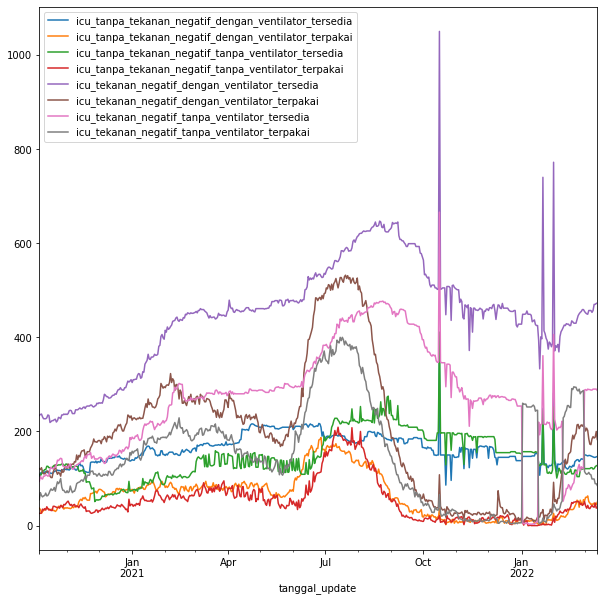

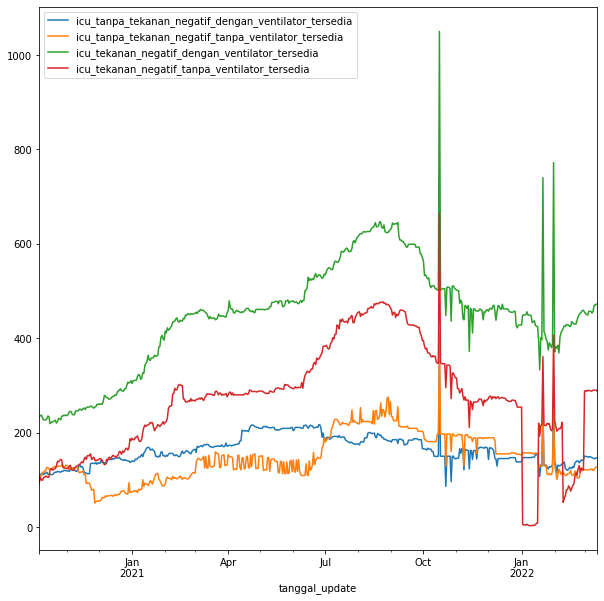

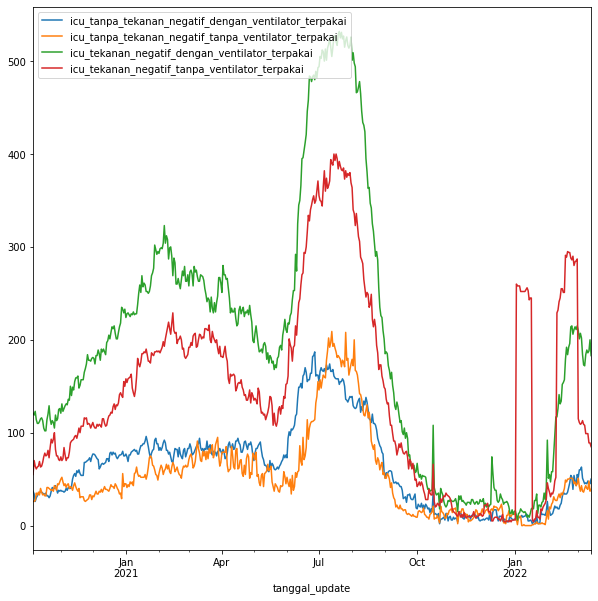

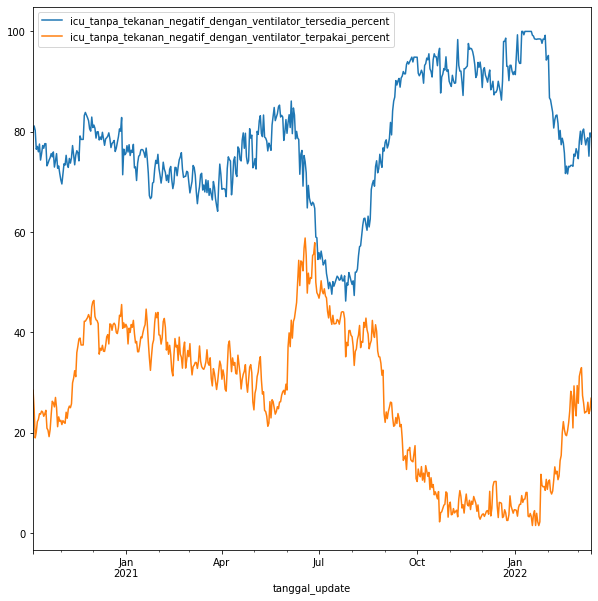

In [109]:
df1 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_tersedia',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_terpakai',
    'icu_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tekanan_negatif_tanpa_ventilator_tersedia',
    'icu_tekanan_negatif_tanpa_ventilator_terpakai'
    ]]
df2 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_tersedia',
    'icu_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tekanan_negatif_tanpa_ventilator_tersedia',
    ]]
df3 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_terpakai',
    'icu_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tekanan_negatif_tanpa_ventilator_terpakai'
    ]]
# df1 = df1.iloc[0:100,]
# df1 = df1.groupby('tanggal_update').agg({'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia':'sum', 'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai':'sum'})
df1 = df1.groupby('tanggal_update').sum()
df2 = df2.groupby('tanggal_update').sum()
df3 = df3.groupby('tanggal_update').sum()
df1.plot(figsize=(10,10))
df2.plot(figsize=(10,10))
df3.plot(figsize=(10,10))
df4 = df1

df4['icu_tanpa_tekanan_negatif_total'] = \
    df1['icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia'] \
    + df1['icu_tanpa_tekanan_negatif_tanpa_ventilator_terpakai']
df4['icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia_percent'] = (
    df4['icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia'] \
    / df4['icu_tanpa_tekanan_negatif_total'] * 100)
df4['icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai_percent'] = (
    df4['icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai'] \
    / df4['icu_tanpa_tekanan_negatif_total'] * 100)
df4 = df4[[
    'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia_percent',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai_percent'
    ]]
# df = df.drop('tanggal_update_api', 1)
df4.plot(figsize=(10,10))

In [102]:
dftemp = df.drop(
    ['tanggal_update',
    'kabupaten_kota',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_tersedia',
    'icu_tanpa_tekanan_negatif_tanpa_ventilator_terpakai',
    'icu_tekanan_negatif_dengan_ventilator_tersedia',
    'icu_tekanan_negatif_dengan_ventilator_terpakai',
    'icu_tekanan_negatif_tanpa_ventilator_tersedia',
    'icu_tekanan_negatif_tanpa_ventilator_terpakai'
    ],1)
dftemp

,isolasi_tanpa_tekanan_negatif_tersedia,isolasi_tanpa_tekanan_negatif_terpakai,isolasi_tekanan_negatif_tersedia,isolasi_tekanan_negatif_terpakai,total_icu_covid_tersedia,total_icu_covid_terpakai,total_isolasi_covid_tersedia,total_isolasi_covid_terpakai,nicu_covid_tersedia,nicu_covid_terpakai,picu_covid_tersedia,picu_covid_terpakai,tersedia_all,terpakai_all,bor_percent,igd_covid_tersedia,igd_covid_terpakai,vk_covid_tersedia,vk_covid_terpakai,tersedia_h_k_m,terpakai_h_k_m,bor_percent_h_k_m,id
0,58,40,15,10,10,9,73,50,0,0,0,0,83,59,39.911250,0,0,0,0,83,59,39.911250,1
1,60,2,13,5,13,0,73,7,0,0,0,0,86,7,5.577500,0,0,0,0,80,7,5.707500,2
2,382,218,140,99,41,14,522,317,2,1,0,0,565,332,32.251224,0,0,0,0,534,320,32.385918,3
3,383,269,257,176,53,25,640,445,3,0,0,0,696,470,43.694000,0,0,0,0,676,468,44.789000,4
4,14,5,3,2,8,0,17,7,0,0,0,0,25,7,10.000000,0,0,0,0,17,7,10.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14143,397,272,45,37,31,17,442,309,2,1,2,2,477,329,0.689727,23,0,17,12,450,311,0.691111,14144
14144,329,79,57,21,42,13,386,100,11,8,0,0,439,121,0.275626,6,0,1,0,401,109,0.271820,14145
14145,491,165,369,148,58,35,860,313,8,3,2,1,928,352,0.379310,98,24,9,0,901,337,0.374029,14146
14146,223,83,54,18,16,2,277,101,2,0,1,0,296,103,0.347973,27,0,2,2,282,103,0.365248,14147


<AxesSubplot:xlabel='tanggal_update'>

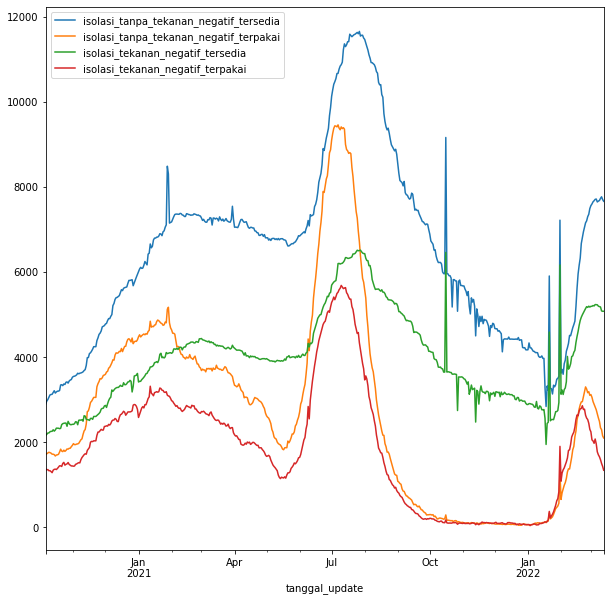

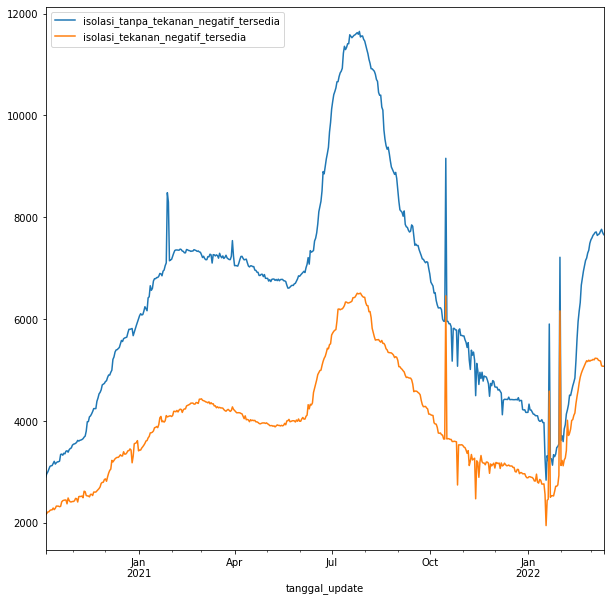

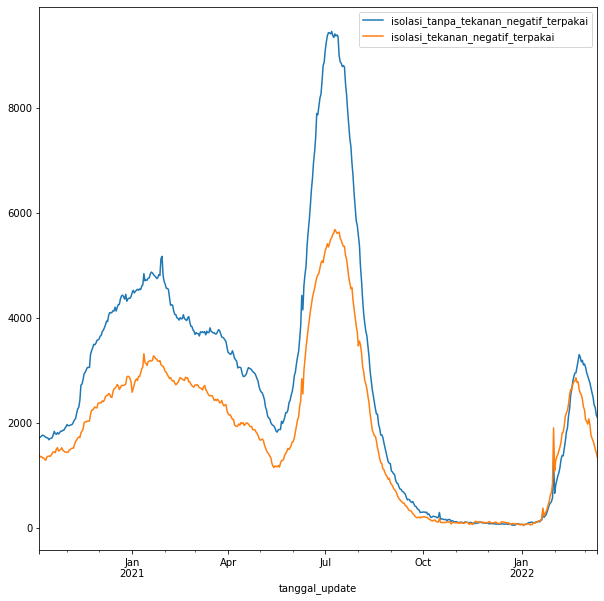

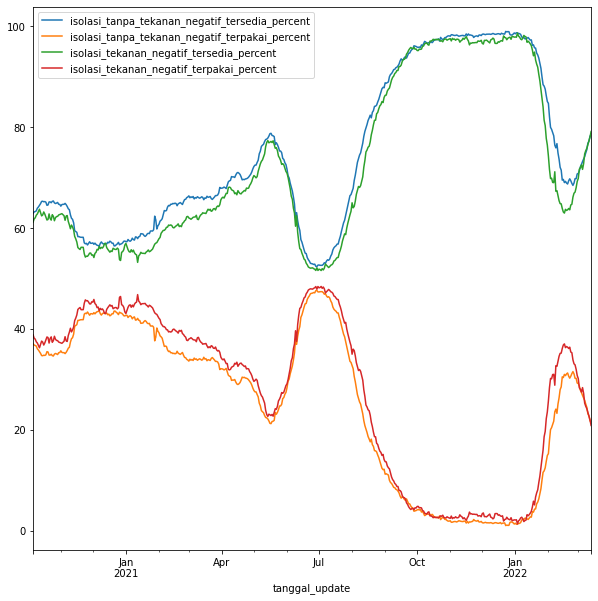

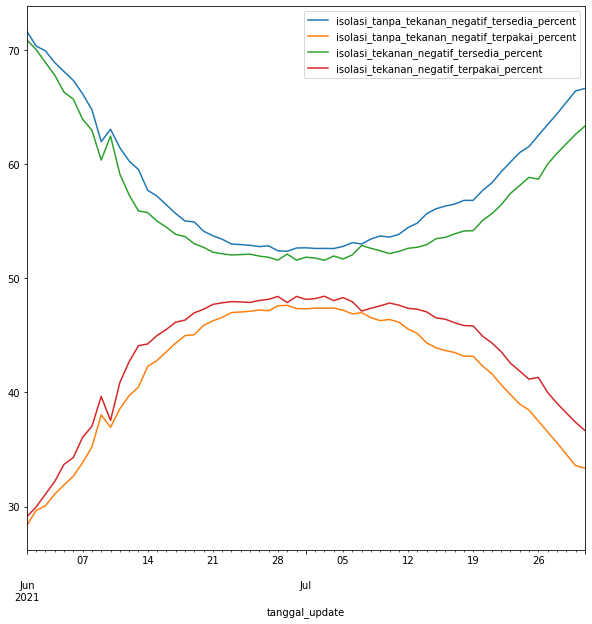

In [112]:
df1 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'isolasi_tanpa_tekanan_negatif_tersedia',
    'isolasi_tanpa_tekanan_negatif_terpakai',
    'isolasi_tekanan_negatif_tersedia',
    'isolasi_tekanan_negatif_terpakai',
    ]]
df2 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'isolasi_tanpa_tekanan_negatif_tersedia',
    'isolasi_tekanan_negatif_tersedia',
    ]]
df3 = df[
    ['tanggal_update',
    'kabupaten_kota',
    'isolasi_tanpa_tekanan_negatif_terpakai',
    'isolasi_tekanan_negatif_terpakai',
    ]]
# df1 = df1.iloc[0:100,]
# df1 = df1.groupby('tanggal_update').agg({'icu_tanpa_tekanan_negatif_dengan_ventilator_tersedia':'sum', 'icu_tanpa_tekanan_negatif_dengan_ventilator_terpakai':'sum'})
df1 = df1.groupby('tanggal_update').sum()
df2 = df2.groupby('tanggal_update').sum()
df3 = df3.groupby('tanggal_update').sum()
df1.plot(figsize=(10,10))
df2.plot(figsize=(10,10))
df3.plot(figsize=(10,10))
df4 = df1

df4['isolasi_tanpa_tekanan_negatif_total'] = \
    df1['isolasi_tanpa_tekanan_negatif_tersedia'] \
    + df1['isolasi_tanpa_tekanan_negatif_terpakai']
df4['isolasi_tanpa_tekanan_negatif_tersedia_percent'] = (
    df4['isolasi_tanpa_tekanan_negatif_tersedia'] \
    / df4['isolasi_tanpa_tekanan_negatif_total'] * 100)
df4['isolasi_tanpa_tekanan_negatif_terpakai_percent'] = (
    df4['isolasi_tanpa_tekanan_negatif_terpakai'] \
    / df4['isolasi_tanpa_tekanan_negatif_total'] * 100)

df4['isolasi_tekanan_negatif_total'] = \
    df1['isolasi_tekanan_negatif_tersedia'] \
    + df1['isolasi_tekanan_negatif_terpakai']
df4['isolasi_tekanan_negatif_tersedia_percent'] = (
    df4['isolasi_tekanan_negatif_tersedia'] \
    / df4['isolasi_tekanan_negatif_total'] * 100)
df4['isolasi_tekanan_negatif_terpakai_percent'] = (
    df4['isolasi_tekanan_negatif_terpakai'] \
    / df4['isolasi_tekanan_negatif_total'] * 100)

df4 = df4[[
    'isolasi_tanpa_tekanan_negatif_tersedia_percent',
    'isolasi_tanpa_tekanan_negatif_terpakai_percent',
    'isolasi_tekanan_negatif_tersedia_percent',
    'isolasi_tekanan_negatif_terpakai_percent'
    ]]
df5 = df4.loc['2021-06-01':'2021-07-31']
# df = df.drop('tanggal_update_api', 1)
df4.plot(figsize=(10,10))
df5.plot(figsize=(10,10))